In [39]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
from pathlib import Path

# np.random.seed(42)

#generowanie wykresów

In [40]:
# wczytanie plików
datapath = Path() / "data" / "lifesat"
oecd_bli = pd.read_csv(datapath / "oecd_bli.csv")
gdp_per_capita = pd.read_csv(datapath / "gdp_per_capita.csv")

In [41]:
display(oecd_bli)

,LOCATION,Country,INDICATOR,Indicator,MEASURE,Measure,INEQUALITY,Inequality,Unit Code,Unit,PowerCode Code,PowerCode,Reference Period Code,Reference Period,Value,Flag Codes,Flags
0,AUS,Australia,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,5.40,NaN,NaN
1,AUT,Austria,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.50,NaN,NaN
2,BEL,Belgium,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.70,NaN,NaN
3,CAN,Canada,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,6.00,NaN,NaN
4,CZE,Czech Republic,JE_LMIS,Labour market insecurity,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,3.10,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2364,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,TOT,Total,PC,Percentage,0,Units,NaN,NaN,0.54,NaN,NaN
2365,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,32.09,NaN,NaN
2366,LTU,Lithuania,WL_EWLH,Employees working very long hours,L,Value,MN,Men,PC,Percentage,0,Units,NaN,NaN,0.67,NaN,NaN
2367,COL,Colombia,WL_EWLH,Employees working very long hours,L,Value,WMN,Women,PC,Percentage,0,Units,NaN,NaN,19.37,NaN,NaN


In [42]:
# wybranie roku 2020 z "gdp_per_capita" i zmania nazwy kolumny
gdp_per_capita_2020 = gdp_per_capita[gdp_per_capita["Year"]==2020]
gdp_per_capita_2020 = gdp_per_capita_2020.rename(
    columns={"GDP per capita, PPP (constant 2017 international $)": "GDP per capita (USD)"}
)


In [43]:
oecd_bli["Indicator"].value_counts()

Indicator
Student skills                                       200
Self-reported health                                 182
Quality of support network                           168
Life satisfaction                                    168
Labour market insecurity                             162
Homicide rate                                        123
Feeling safe walking alone at night                  123
Life expectancy                                      123
Water quality                                        123
Employment rate                                      123
Years in education                                   120
Educational attainment                               120
Long-term unemployment rate                          117
Employees working very long hours                    117
Time devoted to leisure and personal care             69
Air pollution                                         41
Voter turnout                                         41
Stakeholder engagemen

In [44]:
# wybranie interesujących danych z "oecd_bli" i robimy pivot table
oecd_bli = oecd_bli[oecd_bli["INEQUALITY"]=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns="Indicator", values="Value")

In [45]:
# zresetowanie indexu tabeli
oecd_bli = oecd_bli.reset_index()

# wyświetlenie info
oecd_bli.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 25 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Country                                            41 non-null     object 
 1   Air pollution                                      41 non-null     float64
 2   Dwellings without basic facilities                 38 non-null     float64
 3   Educational attainment                             40 non-null     float64
 4   Employees working very long hours                  39 non-null     float64
 5   Employment rate                                    41 non-null     float64
 6   Feeling safe walking alone at night                41 non-null     float64
 7   Homicide rate                                      41 non-null     float64
 8   Household net adjusted disposable income           30 non-null     float64
 9   Household ne

In [46]:
# mergowanie tabeli
full_country_stats = oecd_bli.merge(gdp_per_capita_2020, left_on="Country", right_on="Entity", how="inner")

In [47]:
# wyrzucamy nieinteresujące kolumny
full_country_stats = full_country_stats[["Country", "Life satisfaction", "GDP per capita (USD)"]]
full_country_stats = full_country_stats.sort_values(by="GDP per capita (USD)")

In [48]:
full_country_stats.to_csv(datapath / "lifesat_full.csv", index=False)

In [49]:
min_gdp = 23_500
max_gdp = 62_500

country_stats = full_country_stats[(full_country_stats["GDP per capita (USD)"]>=min_gdp) & 
                                   (full_country_stats["GDP per capita (USD)"]<=max_gdp)]

country_stats.to_csv(datapath / "lifesat.csv", index=False)

In [50]:
#  Wczytujemy dane
lifesat = pd.read_csv(datapath / "lifesat.csv")

# przygotowujemy dane
lifesat.rename(columns={"GDP per capita (USD)": "PKB na mieszkanca (USD)"}, inplace=True)
lifesat.rename(columns={"Life satisfaction": "Satysfakcja z zycia"}, inplace=True)
lifesat

,Country,Satysfakcja z zycia,PKB na mieszkanca (USD)
0,Russia,5.8,26456.387938
1,Greece,5.4,27287.083401
2,Turkey,5.5,28384.987785
3,Latvia,5.9,29932.493910
4,Hungary,5.6,31007.768407
5,Portugal,5.4,32181.154537
6,Poland,6.1,32238.157259
7,Estonia,5.7,35638.421351
8,Spain,6.3,36215.447591
9,Slovenia,5.9,36547.738956


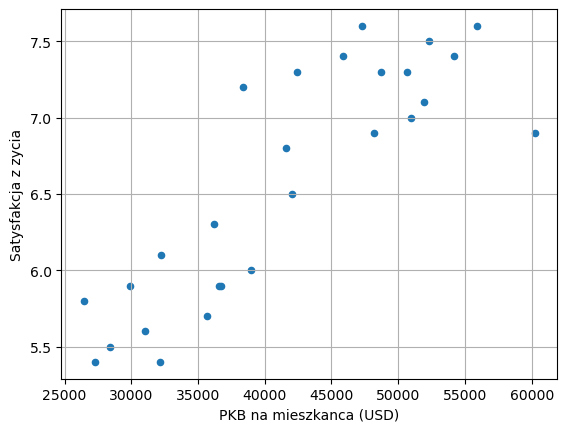

In [51]:
# Wizualizacja danych
lifesat.plot(kind="scatter", grid=True,
             x="PKB na mieszkanca (USD)", y="Satysfakcja z zycia")

plt.show()

In [52]:
# przygotowujemy zmiany w modelu
x = lifesat[["PKB na mieszkanca (USD)"]]
y = lifesat[["Satysfakcja z zycia"]]

# model
model = LinearRegression()
model.fit(x, y)

# obliczone współczynniki modelu
theta_0=model.intercept_[0]
theta_1=model.coef_[0][0]
print(f"theta_0:\t{theta_0}")
print(f"theta_1:\t{theta_1}")

theta_0:	3.7490494273769093
theta_1:	6.778899694341222e-05


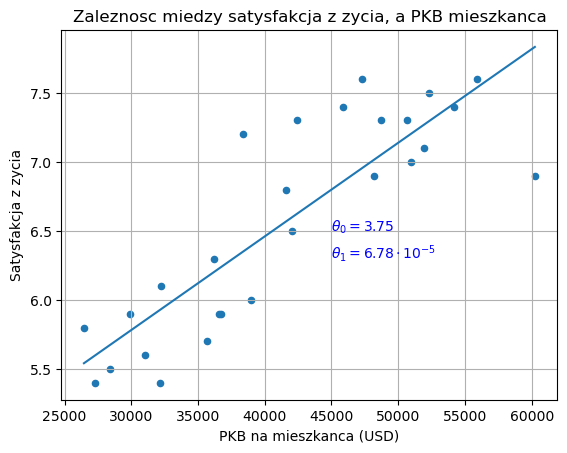

In [53]:
# wizualizacja danych
lifesat.plot(kind="scatter", grid=True,
             x="PKB na mieszkanca (USD)", y="Satysfakcja z zycia")
plt.plot(x, theta_0+theta_1*x)
plt.text(45000, 6.5, fr"$\theta_0 = {theta_0.round(2)}$", color="blue")
plt.text(45000, 6.3, fr"$\theta_1 = {theta_1 * 1e5:.2f}\cdot 10^{{-5}}$", color="blue")
plt.title("Zaleznosc miedzy satysfakcja z zycia, a PKB mieszkanca")
plt.show()

In [56]:
# prognoza
cyprus_gdp_per_capita = (
    gdp_per_capita_2020[gdp_per_capita_2020["Entity"]=="Cyprus"][["GDP per capita (USD)"]]
)
cyprus_gdp_per_capita.rename(columns={"GDP per capita (USD)": "PKB na mieszkanca (USD)"}, inplace=True)
cyprus_gdp_per_capita

,PKB na mieszkanca (USD)
1517,37655.180346


In [57]:
cyprus_predicted_life_satisfaction = model.predict(cyprus_gdp_per_capita)
cyprus_predicted_life_satisfaction

array([[6.30165633]])

In [58]:
# model 3 najbliższych sąsiadów
from sklearn.neighbors import KNeighborsRegressor
model_knn = KNeighborsRegressor(n_neighbors=3)
model_knn.fit(x,y)
model_knn.predict(cyprus_gdp_per_capita)


array([[6.33333333]])

In [59]:
# porównanie z ręcznym policzniem
(7.2+5.9+5.9)/3

6.333333333333333

Ten człowioek od tej książki ma ten kod na github